In [1]:
from orbit.utils.dataset import load_iclaims
from orbit.eda import eda_plot
import orbit.constants.palette as palette

import seaborn as sns
import pandas as pd

import numpy as np
from orbit.models import LGT, DLT
import arviz as az
from orbit.diagnostics.plot import plot_param_diagnostics, plot_predicted_data
from orbit.utils.plot import get_orbit_style

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib import rc

# Orbit Signature Palette and Plot Style  

Oribt provides a set of qualitative, sequential and divering palettes to choose from, and a unique Orbit signature plotting style to create unique and visually pleasing charts. 

To use for Orbit Palette 

import orbit.constants.palette as palette
 
specify choice of colors for example: palette.OrbitPalette.BLUE_GRADIENT.value

Users have the option to use Orbit style for the entire notebook or just for individual plotting functions: 

1. use Orbit plotting style for the entire notebook: this WILL overwrite user's style or default style for the entire notebook

    orbit_style = get_orbit_style()
    
    plt.style.use(orbit_style)
    
2. only use Orbit plotting style for Orbit plotting functions: this will NOT impact user's style or default style for the entire notebook 

    user to specify whether to use orbit style for individual functions (default use_orbit_style=True). Please see examples below
    


In [4]:
raw_df = load_iclaims()
raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [5]:
df = raw_df.copy()

In [6]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [7]:
test_size=52

train_df=df[:-test_size]
test_df=df[-test_size:]

In [8]:
dlt = DLT(response_col='claims',
             date_col='week',
             seasonality=52,
             seed=2020)

In [9]:
dlt.fit(train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [10]:
predicted_df = dlt.predict(df=df, decompose=True)
predicted_df

,week,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95,regression_5,regression,regression_95
0,2010-01-03,13.282945,13.387017,13.496885,12.974152,13.077699,13.171040,0.272877,0.306664,0.339836,0.0,0.0,0.0
1,2010-01-10,13.512545,13.613519,13.719359,12.989363,13.082902,13.160715,0.457050,0.541612,0.613547,0.0,0.0,0.0
2,2010-01-17,13.261676,13.376100,13.481059,12.980930,13.069294,13.198988,0.233724,0.303712,0.382880,0.0,0.0,0.0
3,2010-01-24,12.997246,13.161258,13.373597,12.933521,13.079675,13.184074,-0.043989,0.085492,0.329129,0.0,0.0,0.0
4,2010-01-31,13.053523,13.187187,13.280910,12.965601,13.068511,13.163614,0.038108,0.109961,0.183865,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2018-05-27,12.128130,12.225532,12.349437,12.161564,12.257416,12.386220,-0.056662,-0.024462,0.000079,0.0,0.0,0.0
439,2018-06-03,12.053329,12.164517,12.298734,12.140461,12.256120,12.393392,-0.115286,-0.083959,-0.058784,0.0,0.0,0.0
440,2018-06-10,12.164289,12.253961,12.365318,12.131554,12.239526,12.357624,-0.023095,0.011267,0.037542,0.0,0.0,0.0
441,2018-06-17,12.126587,12.246147,12.329005,12.141949,12.261935,12.357400,-0.052046,-0.018340,0.007806,0.0,0.0,0.0


## Use Orbit Style for the Notebook

In [11]:
###### call for orbit style 
# orbit_style = get_orbit_style()   
# plt.style.use(orbit_style)

###### change back to default 
# plt.style.use(default)

## Use Orbit Style for Individual Functions 

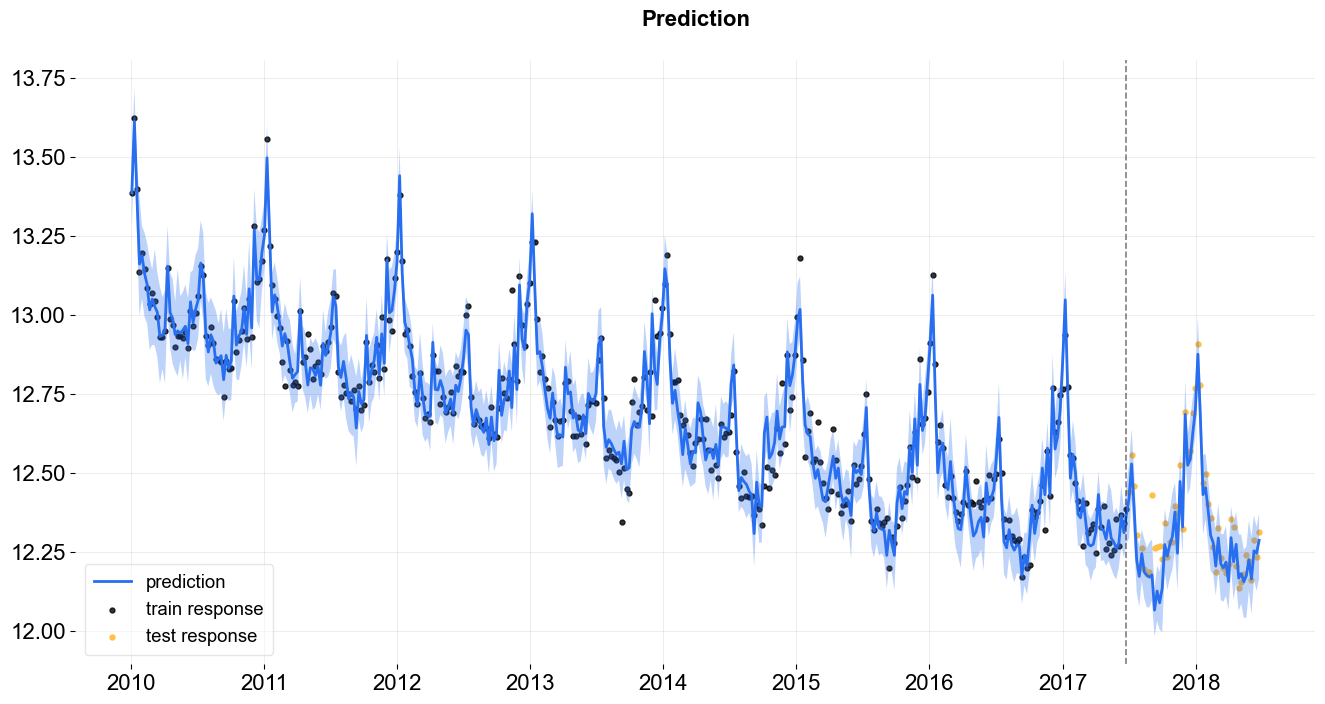

In [12]:
# default using orbit style 
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        title='Prediction',
                        date_col='week',
                        actual_col='claims',
                        test_actual_df=test_df)

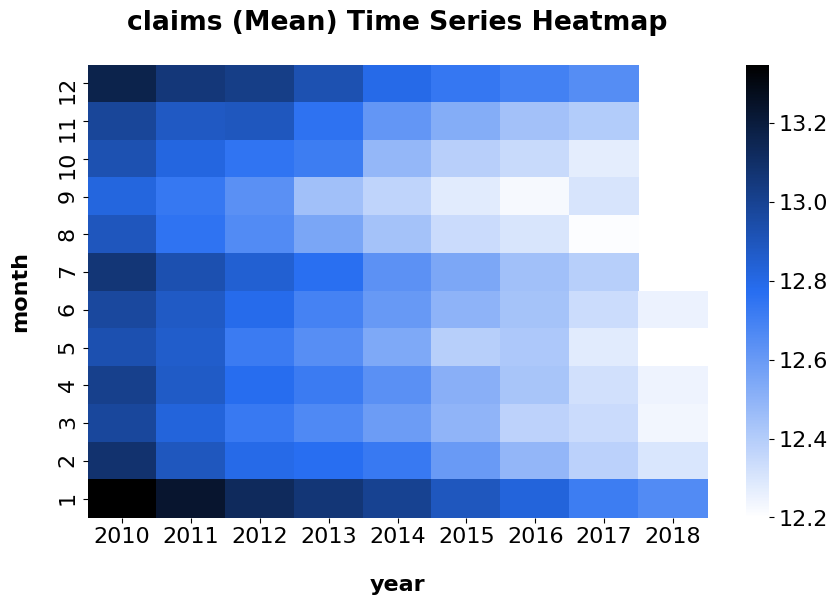

In [13]:
# specify to use orbit style

_ = eda_plot.ts_heatmap(df = df, date_col = 'week', value_col='claims', 
                        palette = palette.OrbitPalette.BLUE_GRADIENT.value, use_orbit_style=True)

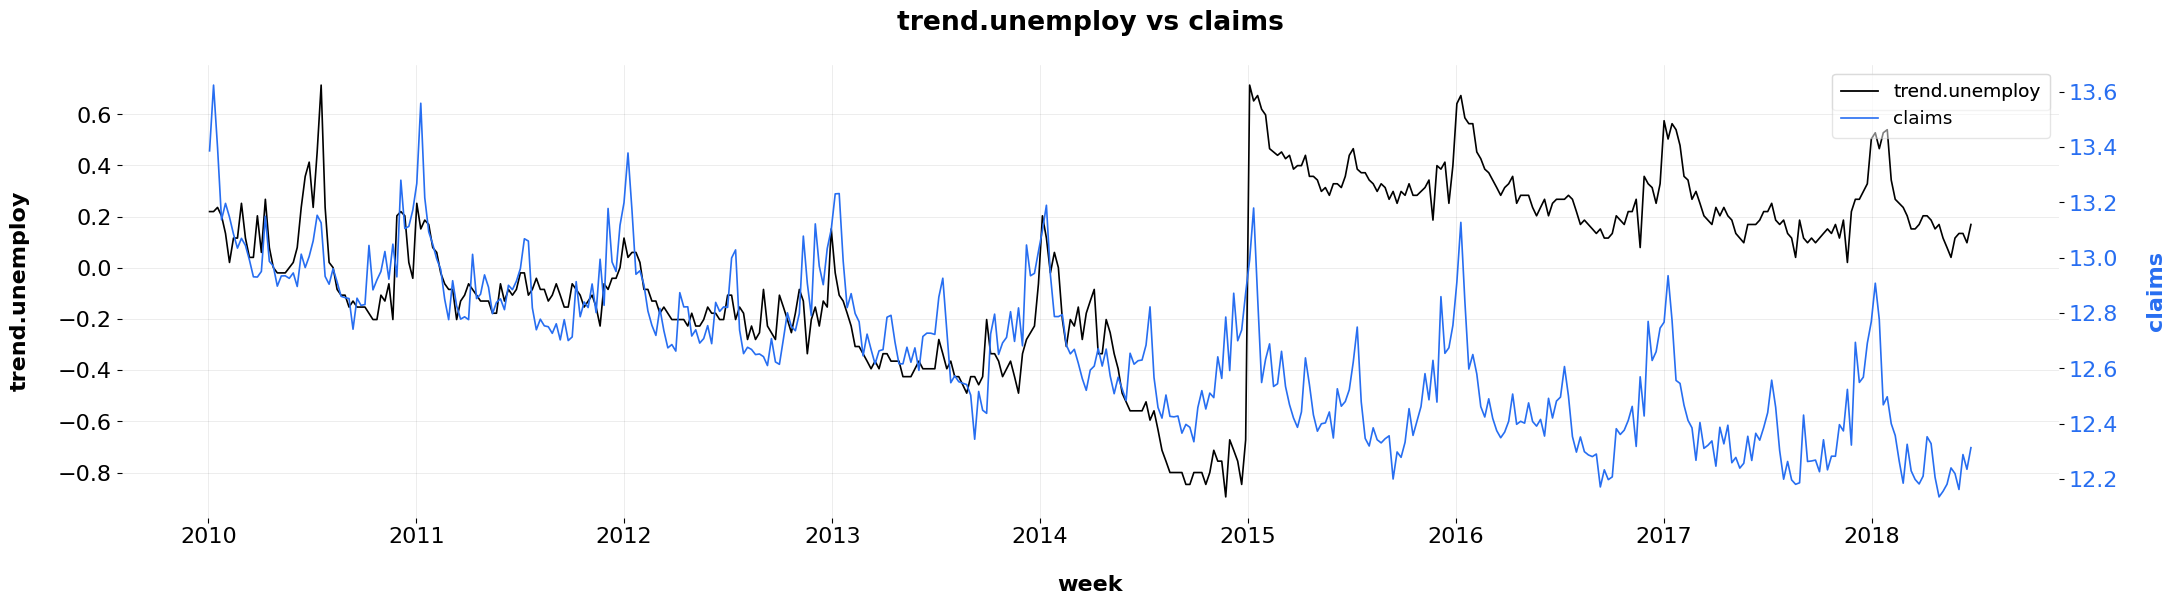

In [14]:
# use orbit style and orbit palette
_ = eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week')

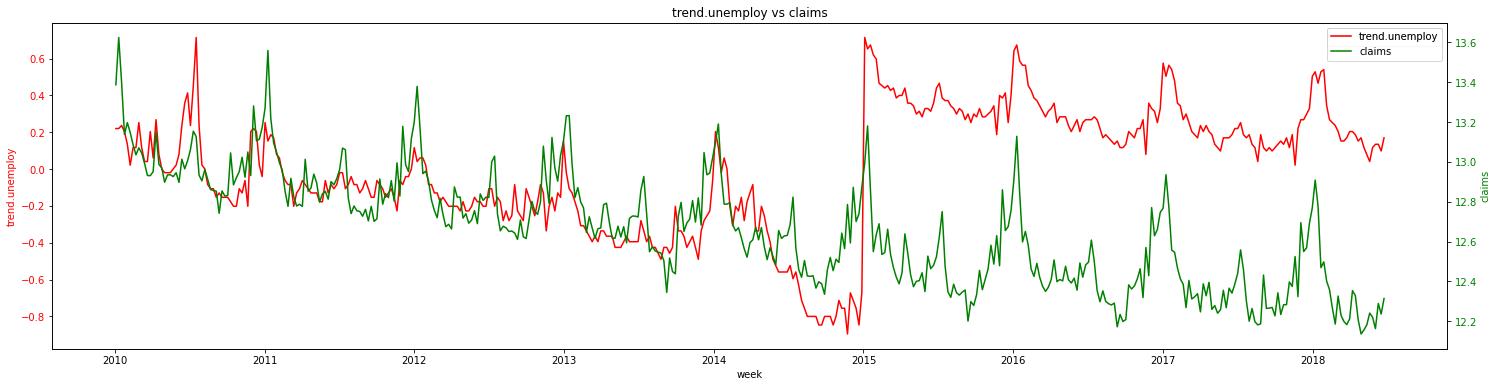

In [15]:
# use customize style and customized palette
_ = eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week', color1='red', color2='green',
                               use_orbit_style=False)